EXPÉRIMENTATION : MÉTHODES DE GRADIENT
Fonction test: f(x,y) = 1/2*x² + 7/2*y²
Point initial: x0 = [7.0, 1.5]
Minimum global: [0, 0]

1. MÉTHODE DE PLUS PROFONDE DESCENTE
Calcul du pas optimal à chaque itération
Convergence en 44 itérations pour ε=1e-5

Premières itérations (cf. Tableau 2.1):


,k,"f(xk,yk)","||∇f(xk,yk)||",x_k,y_k,s_k
0,0,3.237500e+01,12.619429,7.000000,1.500000e+00,0.194030
1,1,1.692537e+01,6.780589,5.641791,-5.373134e-01,0.351351
2,2,8.848440e+00,6.597330,3.659540,7.841872e-01,0.194030
3,3,4.625889e+00,3.544834,2.949480,-2.809029e-01,0.351351
4,4,2.418375e+00,3.449028,1.913176,4.099663e-01,0.194030
5,5,1.264306e+00,1.853209,1.541963,-1.468536e-01,0.351351
40,40,1.751252e-10,0.000029,0.000016,3.488677e-06,0.194030
41,41,9.155398e-11,0.000016,0.000013,-1.249675e-06,0.351351
42,42,4.786364e-11,0.000015,0.000009,1.823850e-06,0.194030
43,43,2.502270e-11,0.000008,0.000007,-6.533196e-07,NaN



2. MÉTHODES DE GRADIENT À PAS FIXE
Comparaison de différents pas constants

Pas fixe = 0.325:
  → Convergence en 1000 itérations
  → Non convergence, ||∇f|| final = 26660229538716314042453438900244920656760463251550980446155113040864643148642589089522818812505351381843968.000000

Pas fixe = 0.25:
  → Convergence en 50 itérations

Pas fixe = 0.125:
  → Convergence en 102 itérations

Pas fixe = 0.05:
  → Convergence en 264 itérations

Pas fixe = 0.01:
  → Convergence en 1000 itérations
  → Non convergence, ||∇f|| final = 0.000305

3. VISUALISATION DES RÉSULTATS


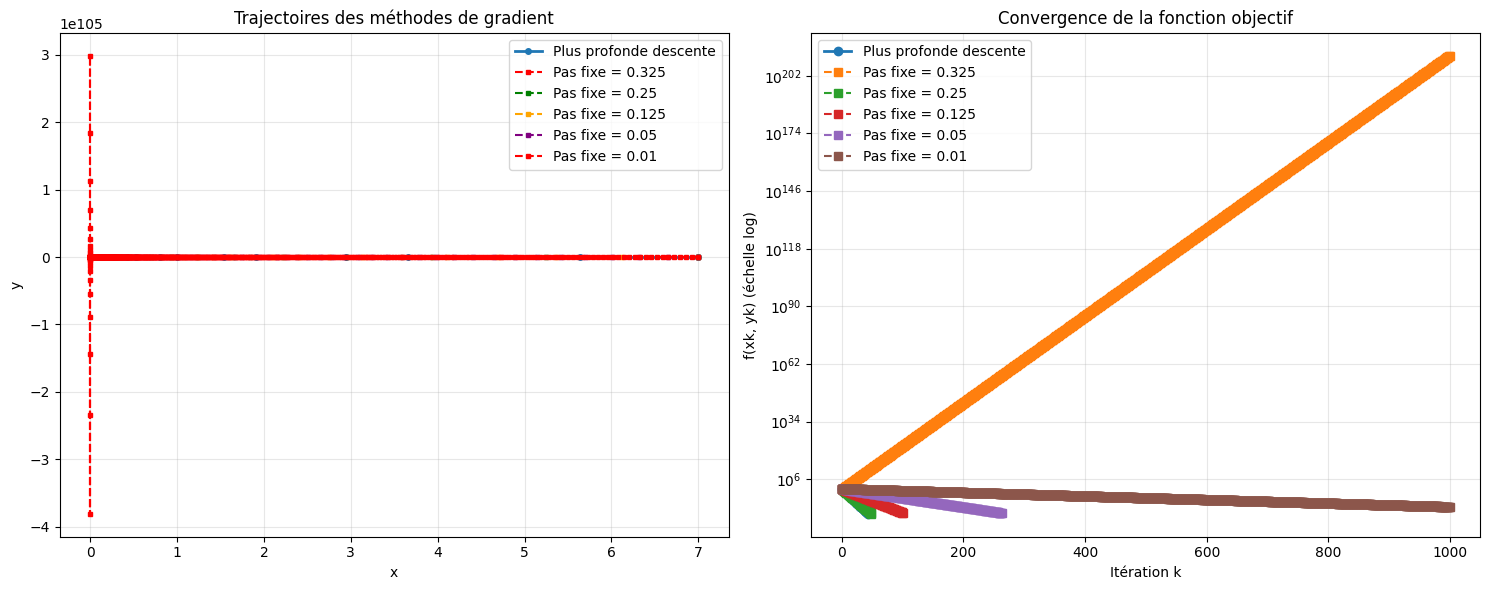


4. REPRODUCTION DE LA FIGURE 2.2 DU SUPPORT


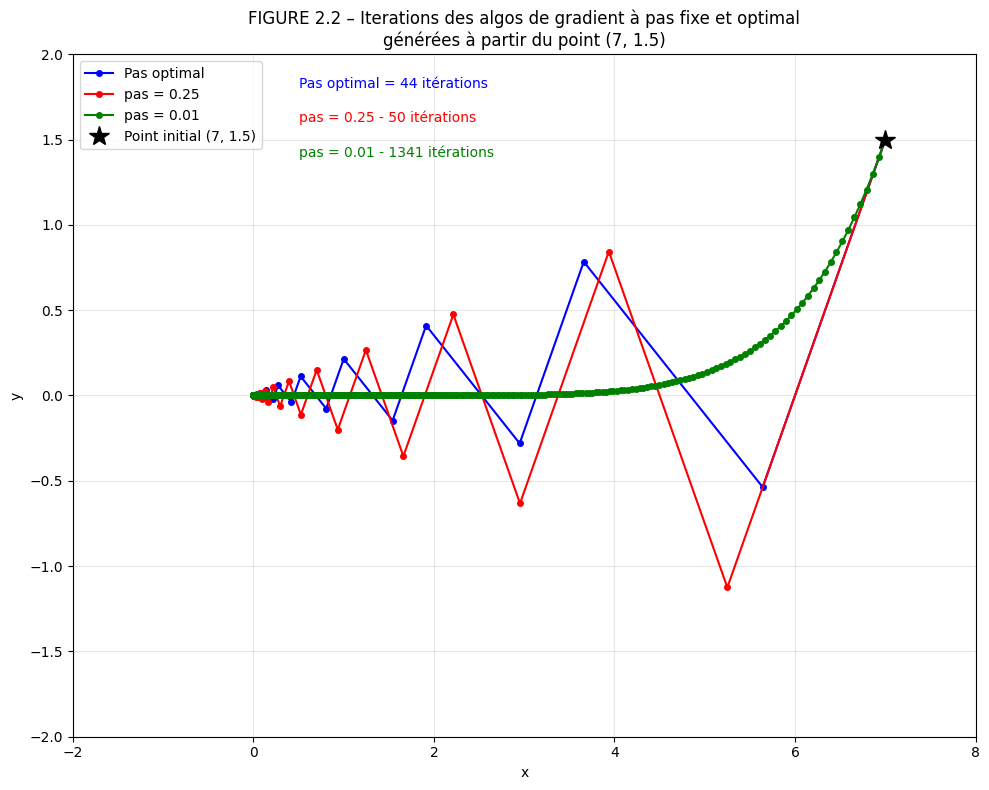

=== VÉRIFICATION DE L'ORTHOGONALITÉ ===
Produits scalaires entre gradients successifs:
Itération 0: ⟨∇f(x_0), ∇f(x_1)⟩ = -0.000000
Itération 1: ⟨∇f(x_1), ∇f(x_2)⟩ = 0.000000
Itération 2: ⟨∇f(x_2), ∇f(x_3)⟩ = 0.000000
Itération 3: ⟨∇f(x_3), ∇f(x_4)⟩ = -0.000000
Itération 4: ⟨∇f(x_4), ∇f(x_5)⟩ = -0.000000

Théoriquement, ces produits scalaires devraient être proches de 0
ce qui confirme l'orthogonalité des directions successives.

ANALYSE COMPARATIVE (cf. Tableau 2.2)
Nombre d'itérations pour convergence à 1e-5 près:
--------------------------------------------------


,Méthode,Itérations
0,Plus profonde descente,44
1,Pas fixe = 0.325,Divergence
2,Pas fixe = 0.25,50
3,Pas fixe = 0.125,102
4,Pas fixe = 0.05,264
5,Pas fixe = 0.01,Divergence



OBSERVATIONS CLÉS:
1. La méthode de plus profonde descente converge mais avec un
   comportement en 'zigzag' dû à l'orthogonalité des directions
2. Le choix du pas fixe est crucial:
   - Pas trop grand → divergence
   - Pas trop petit → convergence lente
   - Pas bien choisi → performance comparable à steepest descent
3. La méthode à pas optimal est plus robuste mais plus coûteuse
   en calculs par itération


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List
import pandas as pd

class GradientDescentExperiments:
    """Classe pour reproduire les expérimentations"""
    
    def __init__(self):
        # Fonction test : f(x,y) = 1/2*x² + 7/2*y²
        self.f = lambda x: 0.5*x[0]**2 + 3.5*x[1]**2
        self.grad_f = lambda x: np.array([x[0], 7*x[1]])
        self.hessian_f = lambda x: np.array([[1, 0], [0, 7]])
        
        # Point initial
        self.x0 = np.array([7.0, 1.5])

    def steepest_descent_step(self, xk: np.ndarray) -> Tuple[float, np.ndarray]:
        """
        Calcule un pas optimal pour la méthode de plus profonde descente
        selon la formule donnée page 33
        """
        x, y = xk
        numerator = x**2 + 49*y**2  # x² + 7²*y²
        denominator = x**2 + 343*y**2  # x² + 7³*y²
        
        s_k = numerator / denominator
        return s_k

    def steepest_descent(self, x0: np.ndarray, epsilon: float = 1e-5, max_iter: int = 100) -> pd.DataFrame:
        """
        Implémente la méthode de plus profonde descente (steepest descent)
        """
        xk = x0.copy()
        iterations = []
        
        for k in range(max_iter):
            f_val = self.f(xk)
            grad_val = self.grad_f(xk)
            grad_norm = np.linalg.norm(grad_val)
            
            # Enregistrement de l'itération
            iterations.append({
                'k': k,
                'f(xk,yk)': f_val,
                '||∇f(xk,yk)||': grad_norm,
                'x_k': xk[0],
                'y_k': xk[1]
            })
            
            # Test d'arrêt
            if grad_norm < epsilon:
                break
            
            # Direction de descente
            dk = -grad_val
            
            # Pas optimal
            s_k = self.steepest_descent_step(xk)
            
            # Mise à jour
            xk = xk + s_k * dk
            
            # Enregistrement du pas (pour l'itération précédente)
            if k > 0:
                iterations[k-1]['s_k'] = s_k_prev
            s_k_prev = s_k
        
        # Ajout du dernier pas
        if len(iterations) > 1:
            iterations[-2]['s_k'] = s_k_prev
        
        return pd.DataFrame(iterations)

    def fixed_step_gradient(self, x0: np.ndarray, step_size: float, 
                          epsilon: float = 1e-5, max_iter: int = 1000) -> pd.DataFrame:
        """
        Implémente la méthode de gradient à pas fixe
        """
        xk = x0.copy()
        iterations = []
        
        for k in range(max_iter):
            f_val = self.f(xk)
            grad_val = self.grad_f(xk)
            grad_norm = np.linalg.norm(grad_val)
            
            iterations.append({
                'k': k,
                'f(xk,yk)': f_val,
                '||∇f(xk,yk)||': grad_norm,
                'x_k': xk[0],
                'y_k': xk[1],
                's_k': step_size
            })
            
            # Test d'arrêt
            if grad_norm < epsilon:
                break
            
            # Mise à jour avec pas fixe
            xk = xk - step_size * grad_val
        
        return pd.DataFrame(iterations)

    def plot_trajectories(self, steepest_df: pd.DataFrame, fixed_step_dfs: dict):
        """
        Trace les trajectoires des différentes méthodes
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Trajectoire dans l'espace des paramètres
        # Steepest descent
        ax1.plot(steepest_df['x_k'], steepest_df['y_k'], 'o-', 
                label='Plus profonde descente', linewidth=2, markersize=4)
        
        # Fixed step methods
        colors = ['red', 'green', 'orange', 'purple']
        for i, (step_size, df) in enumerate(fixed_step_dfs.items()):
            if len(df) > 0:
                ax1.plot(df['x_k'], df['y_k'], 's--', 
                        label=f'Pas fixe = {step_size}', 
                        color=colors[i % len(colors)], markersize=3)
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Trajectoires des méthodes de gradient')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Convergence de la fonction objectif
        k_steepest = np.arange(len(steepest_df))
        ax2.semilogy(k_steepest, steepest_df['f(xk,yk)'], 'o-', 
                    label='Plus profonde descente', linewidth=2)
        
        for step_size, df in fixed_step_dfs.items():
            if len(df) > 0:
                k_fixed = np.arange(len(df))
                ax2.semilogy(k_fixed, df['f(xk,yk)'], 's--', 
                           label=f'Pas fixe = {step_size}')
        
        ax2.set_xlabel('Itération k')
        ax2.set_ylabel('f(xk, yk) (échelle log)')
        ax2.set_title('Convergence de la fonction objectif')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def verify_orthogonality(self, steepest_df: pd.DataFrame):
        """
        Vérifie l'orthogonalité des directions successives dans steepest descent
        """
        print("=== VÉRIFICATION DE L'ORTHOGONALITÉ ===")
        print("Produits scalaires entre gradients successifs:")
        
        for i in range(min(5, len(steepest_df)-1)):
            if i+1 < len(steepest_df):
                xk = np.array([steepest_df.iloc[i]['x_k'], steepest_df.iloc[i]['y_k']])
                xk1 = np.array([steepest_df.iloc[i+1]['x_k'], steepest_df.iloc[i+1]['y_k']])
                
                grad_k = self.grad_f(xk)
                grad_k1 = self.grad_f(xk1)
                
                dot_product = np.dot(grad_k, grad_k1)
                print(f"Itération {i}: ⟨∇f(x_{i}), ∇f(x_{i+1})⟩ = {dot_product:.6f}")
        
        print("\nThéoriquement, ces produits scalaires devraient être proches de 0")
        print("ce qui confirme l'orthogonalité des directions successives.")

    def plot_support_figure(self):
        """
        Reproduit exactement la Figure 2.2 du support
        """
        # Calcul des trajectoires comme dans le support
        steepest_df = self.steepest_descent(self.x0, max_iter=50, epsilon=1e-5)
        fixed_025 = self.fixed_step_gradient(self.x0, 0.25, max_iter=100, epsilon=1e-5)
        fixed_001 = self.fixed_step_gradient(self.x0, 0.01, max_iter=1500, epsilon=1e-5)
        
        # Création de la figure style support
        plt.figure(figsize=(10, 8))
        
        # Steepest descent (pas optimal)
        plt.plot(steepest_df['x_k'], steepest_df['y_k'], 'bo-', 
                 linewidth=1.5, markersize=4, label='Pas optimal')
        
        # Pas fixe = 0.25
        plt.plot(fixed_025['x_k'], fixed_025['y_k'], 'ro-', 
                 linewidth=1.5, markersize=4, label='pas = 0.25')
        
        # Pas fixe = 0.01  
        plt.plot(fixed_001['x_k'], fixed_001['y_k'], 'go-',
                 linewidth=1.5, markersize=4, label='pas = 0.01')
        
        # Point initial
        plt.plot(self.x0[0], self.x0[1], 'k*', markersize=15, label='Point initial (7, 1.5)')
        
        # Configuration style support
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('FIGURE 2.2 – Iterations des algos de gradient à pas fixe et optimal\n' +
                  'générées à partir du point (7, 1.5)', fontsize=12)
        
        # Échelle comme dans l'image
        plt.xlim(-2, 8)
        plt.ylim(-2, 2)
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # Ajouter les annotations de comptage d'itérations comme dans l'image
        plt.text(0.5, 1.8, f"Pas optimal = {len(steepest_df)} itérations", 
                 fontsize=10, color='blue')
        plt.text(0.5, 1.6, f"pas = 0.25 - {len(fixed_025)} itérations", 
                 fontsize=10, color='red')
        plt.text(0.5, 1.4, f"pas = 0.01 - {len(fixed_001)} itérations", 
                 fontsize=10, color='green')
        
        plt.tight_layout()
        plt.show()

# Création des expérimentations
experiments = GradientDescentExperiments()

print("=" * 70)
print("EXPÉRIMENTATION : MÉTHODES DE GRADIENT")
print("Fonction test: f(x,y) = 1/2*x² + 7/2*y²")
print("Point initial: x0 = [7.0, 1.5]")
print("Minimum global: [0, 0]")
print("=" * 70)

# 1. Méthode de plus profonde descente (Steepest Descent)
print("\n1. MÉTHODE DE PLUS PROFONDE DESCENTE")
print("Calcul du pas optimal à chaque itération")

steepest_results = experiments.steepest_descent(experiments.x0, epsilon=1e-5)
print(f"Convergence en {len(steepest_results)} itérations pour ε=1e-5")

# Affichage des premières itérations (comme dans le tableau 2.1)
print("\nPremières itérations (cf. Tableau 2.1):")
display_cols = ['k', 'f(xk,yk)', '||∇f(xk,yk)||', 'x_k', 'y_k']
if 's_k' in steepest_results.columns:
    display_cols.append('s_k')

# Afficher les itérations spécifiques comme dans le tableau
selected_iterations = [0, 1, 2, 3, 4, 5]
if len(steepest_results) > 43:
    selected_iterations.extend([40, 41, 42, 43])
    
display(steepest_results.iloc[selected_iterations][display_cols])

# 2. Méthodes à pas fixe
print("\n2. MÉTHODES DE GRADIENT À PAS FIXE")
print("Comparaison de différents pas constants")

step_sizes = [0.325, 0.25, 0.125, 0.05, 0.01]
fixed_step_results = {}

for step in step_sizes:
    print(f"\nPas fixe = {step}:")
    results = experiments.fixed_step_gradient(experiments.x0, step, epsilon=1e-5)
    fixed_step_results[step] = results
    print(f"  → Convergence en {len(results)} itérations")
    
    if len(results) == 1000:  # max_iter atteint
        final_grad_norm = results.iloc[-1]['||∇f(xk,yk)||']
        print(f"  → Non convergence, ||∇f|| final = {final_grad_norm:.6f}")

# 3. Visualisation des résultats
print("\n3. VISUALISATION DES RÉSULTATS")
experiments.plot_trajectories(steepest_results, fixed_step_results)

# 4. Figure exacte du support
print("\n4. REPRODUCTION DE LA FIGURE 2.2 DU SUPPORT")
experiments.plot_support_figure()

# 5. Vérification de l'orthogonalité
experiments.verify_orthogonality(steepest_results)

# 6. Analyse comparative
print("\n" + "="*70)
print("ANALYSE COMPARATIVE (cf. Tableau 2.2)")
print("Nombre d'itérations pour convergence à 1e-5 près:")
print("-" * 50)

comparison_data = []
comparison_data.append(("Plus profonde descente", len(steepest_results)))

for step in step_sizes:
    df = fixed_step_results[step]
    if len(df) < 1000:  # Si convergence
        comparison_data.append((f"Pas fixe = {step}", len(df)))
    else:
        comparison_data.append((f"Pas fixe = {step}", "Divergence"))

comparison_df = pd.DataFrame(comparison_data, columns=["Méthode", "Itérations"])
display(comparison_df)

print("\n" + "="*70)
print("OBSERVATIONS CLÉS:")
print("1. La méthode de plus profonde descente converge mais avec un")
print("   comportement en 'zigzag' dû à l'orthogonalité des directions")
print("2. Le choix du pas fixe est crucial:")
print("   - Pas trop grand → divergence")
print("   - Pas trop petit → convergence lente") 
print("   - Pas bien choisi → performance comparable à steepest descent")
print("3. La méthode à pas optimal est plus robuste mais plus coûteuse")
print("   en calculs par itération")